Testing if the qubits decay according to the analytical expression


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from sampler_solver_WORKS_one_ancilla import sampler_solver
from merge_methods_CHAIN import solve_master_equation
from merge_methods_WORKS import solve_master_equation as diagonal_solver
from qiskit_aer import AerSimulator
import numpy as np
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeTorino

backend = AerSimulator()
optimization_level = 3
options = {'default_shots' : 10**4}

omega_c = 1.1
n = 2
kappa = [1.1]
omega_m = [0.8]*n
g = [0.01]*(2*(n-1))
gamma = [0.8*(10**-6)]*n
initial_state = [0]*(2**n)
initial_state[-1] = 1
t = np.linspace(0, 750, 250)
r = 3

evs_qc = sampler_solver(n, omega_m, omega_c, gamma, g, kappa, t, r, initial_state, backend, optimization_level, options, 'one ancilla')
evs_markov = solve_master_equation(n, omega_m, omega_c, gamma, kappa, g, t, initial_state, 'markovian')
#evs_diagonal = diagonal_solver(omega_m, omega_c, gamma, kappa, g, t, initial_state, 'diagonal')

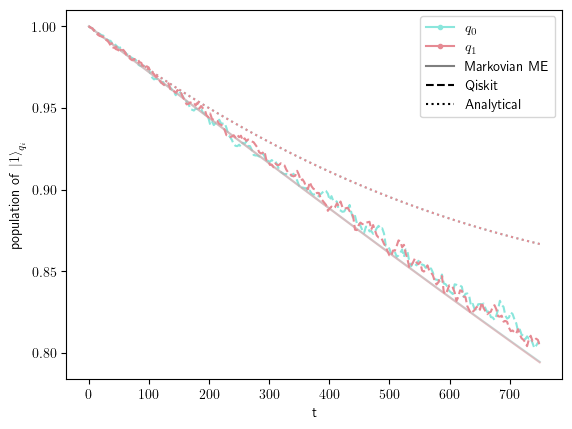

In [ ]:
# Constants needed for the analytical solution

delta = [ x - omega_c for x in omega_m ]
omega_eff = [ omega_m[i] + (delta[i]*(g[i]**2))/((0.5*kappa[0])**2 + delta[i]**2) for i in range(n) ]
g_eff = [ (0.5*g[i]*g[i+1]*(delta[i] + delta[i+1]))/((kappa[0]/2)**2 + delta[i]*delta[i+1]) for i in range(n-1) ]
gamma_eff = [ gamma[i] + (kappa[0]*(g[i]**2))/((0.5*kappa[0])**2 + delta[i]**2) for i in range(n) ]
gamma_cross = [ (g[i]*g[i+1]*(kappa[0]))/((kappa[0]/2)**2 + delta[i]*delta[i+1]) for i in range(n-1)]  
gamma_plus = [(gamma_eff[i] + gamma_eff[i+1])/2 + gamma_cross[i] for i in range(n-1)]
gamma_minus = [(gamma_eff[i] + gamma_eff[i+1])/2 - gamma_cross[i] for i in range(n-1)]


import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
from generate_complementary_colors import generate_complementary_colors

colors = generate_complementary_colors(n, 'pastel', 'turquoise')

for key in evs_qc:

    plt.plot(t, evs_markov[key], linestyle = 'solid', alpha = 0.5, color = colors[int(key)])
    #plt.plot(t, evs_diagonal[key], linestyle = 'solid', color = colors[int(key)])
    plt.plot(t, evs_qc[key], linestyle = 'dashed', color = colors[int(key)])
    plt.plot(t, 1/2*((gamma_plus[0]/gamma_minus[0])*(1 - np.exp(-gamma_minus[0]*t)) + (gamma_minus[0]/gamma_plus[0])*(1-np.exp(-gamma_plus[0]*t))) + np.exp(-(gamma_plus[0] + gamma_minus[0])*t) , linestyle = 'dotted', color = colors[int(key)])
    plt.plot(np.NaN, np.NaN, marker = '.', color = colors[int(key)], label = f'$q_{int(key)}$')

plt.plot(np.NaN, np.NaN, color = 'black', alpha = 0.5, linestyle = 'solid', label = 'Markovian ME')
#plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'solid', label = 'Diagonal approximated ME')
plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'dashed', label = 'Qiskit')
plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'dotted', label = 'Analytical')
plt.xlabel('t')
plt.ylabel('population of $\\left.|1 \\right>_{q_i}$')
plt.legend()
#plt.savefig('two_qubit_real_backend_sim_one_trotter')
plt.show()